<a href="https://colab.research.google.com/github/JulianCarvajal/ProyectoIA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.01 - PROYECTO KAGGLE

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

## unzip and inspect data

In [3]:
!unzip udea*.zip > /dev/null

In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


## load `train.csv` data with pandas and import matplotlib and seaborn



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

## Ver el tamaño del dataFrame

In [6]:
df.shape

(692500, 21)

## Notamos que el dataFrame tiene 692500 registros y 21columnas

In [7]:
# Obtenemos información del dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

## Obtenemos información de las columnas

In [8]:
df.columns.tolist()

['ID',
 'PERIODO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL',
 'coef_1',
 'coef_2',
 'coef_3',
 'coef_4']

In [9]:
# Vemos los primeros registros
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Columna a predecir: `RENDIMIENTO_GLOBAL`

- Obtenemos información de la columna a predecir y sus posibles valores.
- Revisamos su tipo de dato
- Revisamos si hay valores nulos

In [10]:
tipo = df['RENDIMIENTO_GLOBAL'].dtype
print(f"Tipo de dato: {tipo}")

Tipo de dato: object


In [11]:
conteo = df['RENDIMIENTO_GLOBAL'].value_counts()
print(conteo)

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


In [12]:
df.RENDIMIENTO_GLOBAL.isna().sum()

np.int64(0)

## Graficamos los valores de la columna rendimiento

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

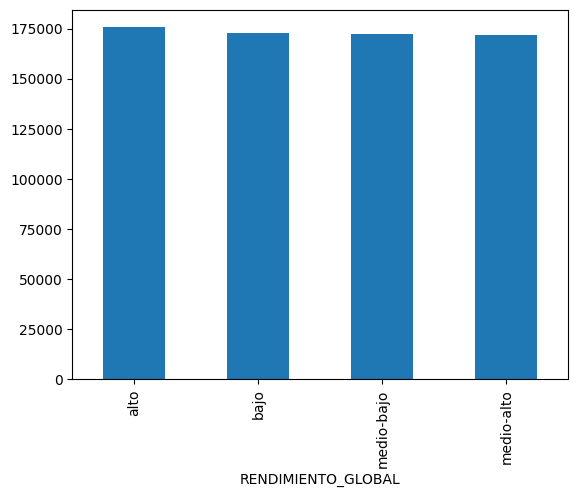

In [13]:
df.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

## Algunos estadísticos de las columnas numéricas

In [14]:
df.describe()

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


Observamos que tanto trabajan los estudiantes que realizaron el examen

In [15]:
df['ESTU_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

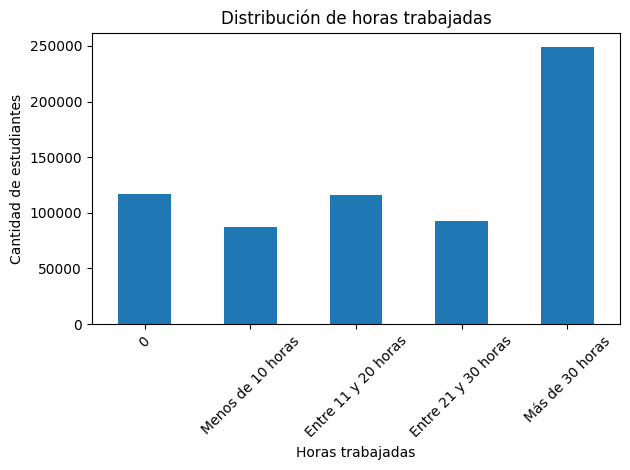

In [16]:
conteo = df['ESTU_HORASSEMANATRABAJA'].value_counts()
orden = ["0", "Menos de 10 horas", "Entre 11 y 20 horas", "Entre 21 y 30 horas", "Más de 30 horas"]
conteo = conteo.loc[orden]
conteo.plot(kind='bar')
plt.title('Distribución de horas trabajadas')
plt.ylabel('Cantidad de estudiantes')
plt.xlabel('Horas trabajadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Intentamos ver si existe una relación entre la cantidad de horas trabajadas a la semana y el resultado obtenido

In [17]:
df['RENDIMIENTO_GLOBAL'].unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [18]:
rendimiento_map = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

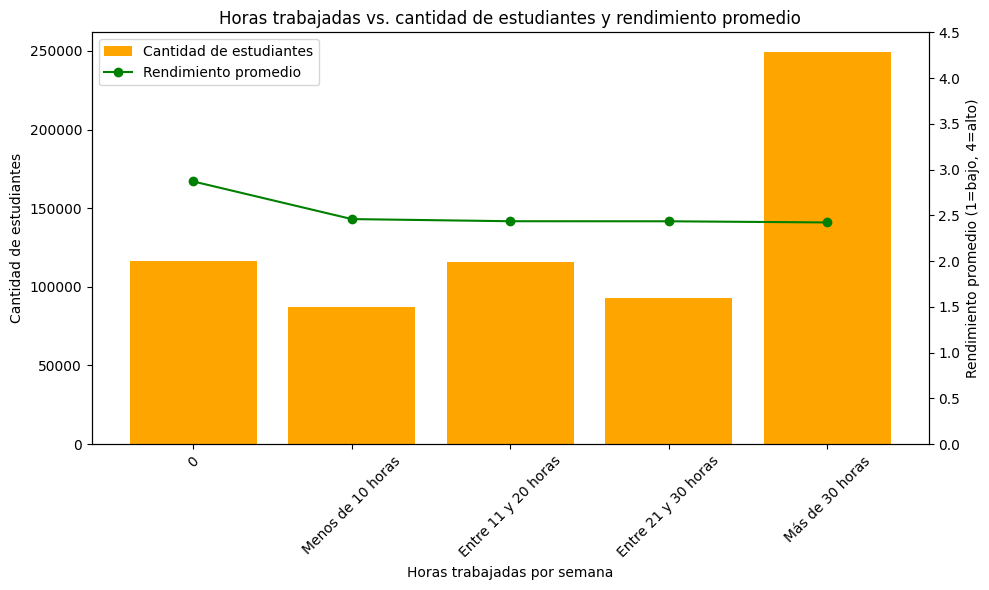

In [21]:
df['RENDIMIENTO_NUM'] = df['RENDIMIENTO_GLOBAL'].map(rendimiento_map)

agrupado = df.groupby('ESTU_HORASSEMANATRABAJA').agg({
    'RENDIMIENTO_GLOBAL': 'count',
    'RENDIMIENTO_NUM': 'mean'
}).rename(columns={
    'RENDIMIENTO_GLOBAL': 'Cantidad_Estudiantes',
    'RENDIMIENTO_NUM': 'Media_Rendimiento'
}).reindex([
    '0',
    'Menos de 10 horas',
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',
    'Más de 30 horas'
])

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(agrupado.index, agrupado['Cantidad_Estudiantes'], color='orange', label='Cantidad de estudiantes')
ax1.set_ylabel('Cantidad de estudiantes', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlabel('Horas trabajadas por semana')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(agrupado.index, agrupado['Media_Rendimiento'], color='green', marker='o', label='Rendimiento promedio')
ax2.set_ylabel('Rendimiento promedio (1=bajo, 4=alto)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 4.5)

plt.title('Horas trabajadas vs. cantidad de estudiantes y rendimiento promedio')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,RENDIMIENTO_NUM
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,3
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311,3
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260,1
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287,2
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328,1
